# Omar Elfeky
# ADS 509 Assignment 2.1: Tokenization, Normalization, Descriptive Statistics 

This notebook holds Assignment 2.1 for Module 2 in ADS 509, Applied Text Mining. Work through this notebook, writing code and answering questions where required. 

In the previous assignment you put together Twitter data and lyrics data on two artists. In this assignment we explore some of the textual features of those data sets. If, for some reason, you did not complete that previous assignment, data to use for this assignment can be found in the assignment materials section of Blackboard. 

This assignment asks you to write a short function to calculate some descriptive statistics on a piece of text. Then you are asked to find some interesting and unique statistics on your corpora. 


## General Assignment Instructions

These instructions are included in every assignment, to remind you of the coding standards for the class. Feel free to delete this cell after reading it. 

One sign of mature code is conforming to a style guide. We recommend the [Google Python Style Guide](https://google.github.io/styleguide/pyguide.html). If you use a different style guide, please include a cell with a link. 

Your code should be relatively easy-to-read, sensibly commented, and clean. Writing code is a messy process, so please be sure to edit your final submission. Remove any cells that are not needed or parts of cells that contain unnecessary code. Remove inessential `import` statements and make sure that all such statements are moved into the designated cell. 

Make use of non-code cells for written commentary. These cells should be grammatical and clearly written. In some of these cells you will have questions to answer. The questions will be marked by a "Q:" and will have a corresponding "A:" spot for you. *Make sure to answer every question marked with a `Q:` for full credit.* 


In [1]:
import os
import re
import emoji
import pandas as pd
import numpy as np
#needed to run once
#import nltk
#nltk.download()
from collections import Counter, defaultdict
from nltk.corpus import stopwords
from string import punctuation
from collections import Counter
sw = stopwords.words("english")

In [2]:
from lexicalrichness import LexicalRichness
import csv
import regex
#default is 1e6
#jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10
#for my desktop
os.environ['NUMEXPR_MAX_THREADS'] = '24'

In [3]:
# change `data_location` to the location of the folder on your machine.
data_location = "/Users/elfek/datamining/"

# These subfolders should still work if you correctly stored the 
# data from the Module 1 assignment
twitter_folder = "twitter/"
lyrics_folder = "lyrics/"

In [4]:
def descriptive_stats(tokens, num_tokens = 5, verbose=True) :
    """
        Given a list of tokens, print number of tokens, number of unique tokens, 
        number of characters, lexical diversity (https://en.wikipedia.org/wiki/Lexical_diversity), 
        and num_tokens most common tokens. Return a list with the number of tokens, number
        of unique tokens, lexical diversity, and number of characters. 
    
    """
    from collections import Counter
    # Fill in the correct values here. 
    num_tokens = len(tokens)
    num_unique_tokens = len(set(tokens))
    lexical_diversity = 0.0
    # Return Measure of Textual Lexical Diversity (MTLD).
    space = " "
    text = space.join( tokens )
    lex = LexicalRichness(text)
    #len(tokens)
    lexical_diversity = lex.hdd(draws=13) #lex.mtld(threshold=0.69) #lex.Herdan #lex.Summer 
    num_characters = 0
    for token in tokens:
        num_characters = num_characters + len(token)

    if verbose :        
        print(f"There are {num_tokens} tokens in the data.")
        print(f"There are {num_unique_tokens} unique tokens in the data.")
        print(f"There are {num_characters} characters in the data.")
        print(f"The lexical diversity is {lexical_diversity:.3f} in the data.")
        # print the five most common tokens
        # Pass the split_it list to instance of Counter class.
        Counter = Counter(tokens)
        # most_common() produces k frequently encountered
        # input values and their respective counts.
        most_occur = Counter.most_common(5)
        print(most_occur)
  
    return([num_tokens, num_unique_tokens,
            lexical_diversity,
            num_characters])

In [5]:
text = """here is some example text with other example text here in this text""".split()
#text
assert(descriptive_stats(text, verbose=True)[0] == 13)
assert(descriptive_stats(text, verbose=False)[1] == 9)
assert(abs(descriptive_stats(text, verbose=False)[2] - 0.69) < 0.02)
assert(descriptive_stats(text, verbose=False)[3] == 55)


There are 13 tokens in the data.
There are 9 unique tokens in the data.
There are 55 characters in the data.
The lexical diversity is 0.692 in the data.
[('text', 3), ('here', 2), ('example', 2), ('is', 1), ('some', 1)]


Q: Why is it beneficial to use assertion statements in your code? 

A: Assertion Statements help in debugging code. It allows you to test parts of code at known states.

## Data Input

Now read in each of the corpora. For the lyrics data, it may be convenient to store the entire contents of the file to make it easier to inspect the titles individually, as you'll do in the last part of the assignment. In the solution, I stored the lyrics data in a dictionary with two dimensions of keys: artist and song. The value was the file contents. A data frame would work equally well. 

For the Twitter data, we only need the description field for this assignment. Feel free all the descriptions read it into a data structure. In the solution, I stored the descriptions as a dictionary of lists, with the key being the artist. 




In [6]:
# Read in the lyrics data
lyricsDictionary = {}
songTitlesCher = []
songTitlesRobyn = []
#reading the file
os.chdir(r"C:\Users\elfek\datamining\lyrics")
for filename in os.listdir("cher"):
    with open(os.path.join("cher", filename), 'r') as f:
        songLyrics = f.read()
        songTitle = songLyrics.split('\n', 1)[0]
        songTitlesCher.append(songTitle)
        #print(songTitle)
        artist = "Cher"
        key = (songTitle.replace("\"", ""), artist)
        lyricsDictionary[key] = songLyrics

        
os.chdir(r"C:\Users\elfek\datamining\lyrics")
for filename in os.listdir("robyn"):
    with open(os.path.join("robyn", filename), 'r') as f:
        songLyrics = f.read()
        songTitle = songLyrics.split('\n', 1)[0]
        #print(songTitle)
        songTitlesRobyn.append(songTitle)
        artist = "Robyn"
        key = (songTitle, artist)
        lyricsDictionary[key] = songLyrics
        

    
#tests
#print(lyricsDictionary[('Again','Cher')])


In [7]:
# Read in the twitter data
# For the Twitter data, we only need the description field for this assignment. 
# Feel free all the descriptions read it into a data structure. In the solution,
# I stored the descriptions as a dictionary of lists, with the key being the artist. 
  
# read text file into pandas DataFrame and
os.chdir(r"C:\Users\elfek\datamining\twitter")

data = open(r"cher_followers_data.txt", encoding="utf8").readlines()

#descriptionListCher = ""
descriptionCher = []
for dataLine in data:
    line = dataLine.split("\t")
    count=0
    for column in line:
        count += 1
        if (count == 7):
            if (column != '\n'):
                #descriptionListCher += column #
                descriptionCher.append(column)

#remove the title line
#descriptionCher = descriptionCher[1:-1]

data = open(r"robynkonichiwa_followers_data.txt", encoding="utf8").readlines()

#descriptionListRobyn = ""
descriptionRobyn = []
for dataLine in data:
    line = dataLine.split("\t")
    count=0
    for column in line:
        count += 1
        #skip the unnecessary columns
        if (count == 7):
            if (column != '\n'):
                #descriptionListRobyn += column # 
                descriptionRobyn.append(column)

#remove the title line
#descriptionRobyn = descriptionRobyn[1:-1]
  
#remove the first 6 words
#re.sub(r'^((?:\w+\W+){6})', '', data[i])

# Remove Special Characters from a String 
#new_text = re.sub(r"[^a-zA-Z0-9 ]", "", data)


## Data Cleaning

Now clean and tokenize your data. Remove punctuation chacters (available in the `punctuation` object in the `string` library), split on whitespace, fold to lowercase, and remove stopwords. Store your cleaned data, which must be accessible as an interable for `descriptive_stats`, in new objects or in new columns in your data frame. 



In [8]:
punctuation = set(punctuation) # speeds up comparison

# can't remove hastags #needhashtags
#string.replace("#", "")

#for testing
#print(punctuation)

#lol the stop words need to be cleaned from punctuation :/
for i in range(len(sw)):
    for char in sw[i]:
        if char in punctuation:
            #print (word)
            sw[i] = sw[i].replace(char, '')

#for testing           
#print(sw)

In [9]:
# create your clean lyrics data here
# Removing punctuations in string
# lyricsCher = ""
# lyricsRobyn = ""
#temp = lyricsDictionary.copy().items()
for key, value in lyricsDictionary.items():
    for ele in value:
        if ele in punctuation:
            value = value.replace(ele, "")
            lyricsDictionary[key] = value.casefold()
        else:
            lyricsDictionary[key] = value.casefold()
            #print(value)

def remove_stopwords(data):
    output_array=[]
    for sentence in data:
        temp_list=[]
        for word in sentence.split():
            if word.lower() not in sw:
                temp_list.append(word)
        output_array.append(' '.join(temp_list))
    return output_array   

cleanLyricsDictionary = {}
for key, value in lyricsDictionary.items():
    for ele in value:
        cleanLyricsDictionary[key] = list(filter(None, remove_stopwords(value.split())))#remove_stopwords(value.split())
        
#for testing
#print(lyricsDictionary[('Again','Cher')])
#print(cleanLyricsDictionary[('Again','Cher')])


In [10]:
lyricsTokenizedRobyn = []
for i in range(len(songTitlesRobyn)): 
    lyricsTokenizedRobyn.extend(cleanLyricsDictionary[songTitlesRobyn[i],'Robyn'])
lyricsTokenizedCher = []
for i in range(len(songTitlesCher)): 
    lyricsTokenizedCher.extend(cleanLyricsDictionary[songTitlesCher[i][1:-1],'Cher'])


In [11]:
uncleanDescriptionCher = descriptionCher.copy()
uncleanDescriptionRobyn = descriptionRobyn.copy()

for i in range(len(descriptionCher)): 
    for ele in descriptionCher[i]:
        if ele in punctuation:
            descriptionCher[i] = descriptionCher[i].replace(ele, "")
    descriptionCher[i] = descriptionCher[i].casefold()
            
for i in range(len(descriptionRobyn)):
    for ele in descriptionRobyn[i]:
        if ele in punctuation:
            descriptionRobyn[i] = descriptionRobyn[i].replace(ele, "")
    descriptionRobyn[i] = descriptionRobyn[i].casefold()

descriptionTokenizedCher = []
for i in range(len(descriptionCher)): 
    descriptionTokenizedCher.extend(list(filter(None, remove_stopwords(descriptionCher[i].split()))))


descriptionTokenizedRobyn = []
for i in range(len(descriptionRobyn)): 
    descriptionTokenizedRobyn.extend(list(filter(None, remove_stopwords(descriptionRobyn[i].split()))))


## Basic Descriptive Statistics

Call your `descriptive_stats` function on both your lyrics data and your twitter data and for both artists (four total calls). 

In [12]:
# calls to descriptive_stats here
print("The description stats for Cher's followers' twitter descriptions: \n")
descriptive_stats(descriptionTokenizedCher)
print("\n")
print("The description stats for Cher's lyrics: \n")
descriptive_stats(lyricsTokenizedCher)
print("\n")
print("The description stats for Robyn's followers' twitter descriptions: \n")
descriptive_stats(descriptionTokenizedRobyn)
print("\n")
print("The description stats for Robyn's lyrics: \n")
descriptive_stats(lyricsTokenizedRobyn)
print("\n")


The description stats for Cher's followers' twitter descriptions: 

There are 15604562 tokens in the data.
There are 1517640 unique tokens in the data.
There are 92659618 characters in the data.
The lexical diversity is 0.995 in the data.
[('love', 214576), ('im', 139098), ('life', 122980), ('music', 88177), ('de', 72974)]


The description stats for Cher's lyrics: 

There are 34605 tokens in the data.
There are 3682 unique tokens in the data.
There are 166607 characters in the data.
The lexical diversity is 0.981 in the data.
[('love', 995), ('im', 515), ('know', 489), ('time', 320), ('baby', 318)]


The description stats for Robyn's followers' twitter descriptions: 

There are 1490474 tokens in the data.
There are 252708 unique tokens in the data.
There are 9105295 characters in the data.
The lexical diversity is 0.996 in the data.
[('music', 15147), ('love', 11677), ('im', 9051), ('och', 7922), ('life', 7383)]


The description stats for Robyn's lyrics: 

There are 14608 tokens in t

Q: How do you think the "top 5 words" would be different if we left stopwords in the data? 

A: The stopwords would have dominated the charts due to their high occurance and taken ranks 1 through 5.

---

Q: What were your prior beliefs about the lexical diversity between the artists? Does the difference (or lack thereof) in lexical diversity between the artists conform to your prior beliefs? 

A: It is very surprising that both artists have very little difference in lexical diversity. Perhaps the lexical diversity metric is sensitive to small differences. Much the same way a Homosapien and Chimpanzee share a high percentage of DNA but that makes a big difference?



## Specialty Statistics

The descriptive statistics we have calculated are quite generic. You will now calculate a handful of statistics tailored to these data.

1. Ten most common emojis by artist in the twitter descriptions.
1. Ten most common hashtags by artist in the twitter descriptions.
1. Five most common words in song titles by artist. 
1. For each artist, a histogram of song lengths (in terms of number of tokens) 

We can use the `emoji` library to help us identify emojis and you have been given a function to help you.


In [13]:
def is_emoji(s):
    return(s in emoji.UNICODE_EMOJI['en'])

assert(is_emoji("❤️"))
assert(not is_emoji(":-)"))

### Emojis 😁

What are the ten most common emojis by artist in the twitter descriptions? 


In [14]:
# Your code here

def extract_emojis(list2):
    emoji_list = []
    list_real = []
    for word in list2:
        temp = re.findall(r'[^\w\s,]', word) #doesn't exactly find emojis since it capture weird non-english chars
        emoji_list.extend(temp)
    for s in emoji_list:
        if (s in emoji.UNICODE_EMOJI['en']): 
            list_real.extend(s)
    return list_real

countsRobyn = Counter(extract_emojis(descriptionTokenizedCher))
countsCher = Counter(extract_emojis(descriptionTokenizedRobyn))
#countsRobyn = Counter(list(filter(None, extract_emojis(descriptionTokenizedCher))))
#countsCher = Counter(list(filter(None, extract_emojis(descriptionTokenizedRobyn))))
print(countsRobyn.most_common(10))
print(countsCher.most_common(10))

[('❤', 79223), ('🌈', 47549), ('♥', 33978), ('🏳', 33412), ('✨', 29468), ('💙', 21379), ('🏻', 20930), ('🌊', 20223), ('✌', 16773), ('💜', 16550)]
[('❤', 4783), ('🌈', 4685), ('🏳', 3528), ('♥', 3103), ('✨', 2223), ('🏻', 1495), ('✌', 1189), ('🏼', 1139), ('♀', 836), ('💙', 809)]


### Hashtags

What are the ten most common hashtags by artist in the twitter descriptions? 


In [15]:
# Your code here

#descriptionRobyn
#descriptionCher
tagsCher = []
tagsRobyn = []
#re.findall(r"#(\w+)", s)
for word in uncleanDescriptionCher:
    tagsCher.extend(re.findall(r"#(\w+)", word.casefold()))
for word in uncleanDescriptionRobyn:
    tagsRobyn.extend(re.findall(r"#(\w+)", word.casefold()))
    
print("The most common hashtags for Cher are:")    
print(Counter(tagsCher).most_common(10))
print("\n")
print("The most common hashtags for Robyn are:")

print(Counter(tagsRobyn).most_common(10))

The most common hashtags for Cher are:
[('resist', 11657), ('blm', 10466), ('blacklivesmatter', 8154), ('theresistance', 3508), ('fbr', 3419), ('resistance', 3061), ('1', 2627), ('voteblue', 2304), ('lgbtq', 2074), ('music', 1602)]


The most common hashtags for Robyn are:
[('blacklivesmatter', 601), ('blm', 362), ('music', 306), ('1', 199), ('teamfollowback', 135), ('edm', 111), ('lgbtq', 89), ('resist', 86), ('travel', 73), ('art', 72)]


### Song Titles

What are the five most common words in song titles by artist? The song titles should be on the first line of the lyrics pages, so if you have kept the raw file contents around, you will not need to re-read the data.


In [16]:
stRobyn = songTitlesRobyn.copy()
stCher = songTitlesCher.copy()
for i in range(len(songTitlesCher)):
    for ele in songTitlesCher[i]:
        if ele in punctuation:
            songTitlesCher[i] = songTitlesCher[i].replace(ele, "").casefold()
        else:
            songTitlesCher[i] = songTitlesCher[i].casefold()
            #print(value)


for i in range(len(songTitlesRobyn)):
    for ele in songTitlesRobyn[i]:
        if ele in punctuation:
            songTitlesRobyn[i] = songTitlesRobyn[i].replace(ele, "").casefold()
        else:
            songTitlesRobyn[i] = songTitlesRobyn[i].casefold()

In [17]:
     
songTitlesTokenizedCher = []
for song in songTitlesCher: 
    songTitlesTokenizedCher.extend(remove_stopwords(song.split()))
    
songTitlesTokenizedRobyn = []
for song in songTitlesRobyn: 
    songTitlesTokenizedRobyn.extend(remove_stopwords(song.split()))
    
print( Counter(songTitlesTokenizedCher).most_common(6)[1:] )
print( Counter(songTitlesTokenizedRobyn).most_common(6)[1:] )
#songTitlesTokenizedCher


[('love', 38), ('man', 12), ('song', 11), ('come', 7), ('one', 7)]
[('love', 6), ('u', 4), ('thing', 3), ('girl', 3), ('tell', 3)]


### Song Lengths

For each artist, a histogram of song lengths (in terms of number of tokens). If you put the song lengths in a data frame with an artist column, matplotlib will make the plotting quite easy. An example is given to help you out. 


artist
Artist 1    AxesSubplot(0.125,0.125;0.775x0.755)
Artist 2    AxesSubplot(0.125,0.125;0.775x0.755)
Name: length, dtype: object

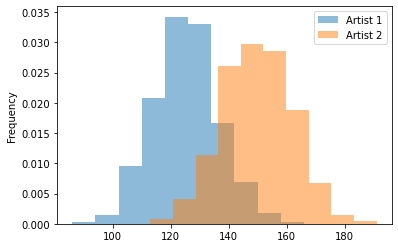

In [18]:
num_replicates = 1000

df = pd.DataFrame({
    "artist" : ['Artist 1'] * num_replicates + ['Artist 2']*num_replicates,
    "length" : np.concatenate((np.random.poisson(125,num_replicates),np.random.poisson(150,num_replicates)))
})

df.groupby('artist')['length'].plot(kind="hist",density=True,alpha=0.5,legend=True)


Since the lyrics may be stored with carriage returns or tabs, it may be useful to have a function that can collapse whitespace, using regular expressions, and be used for splitting. 

Q: What does the regular expression `'\s+'` match on? 

A: The regular expression matches on any combinacion and repetition of whitespace characters such as space, tab, carriage return, new line, vertical tab, form feed characterd.


In [19]:
collapse_whitespace = re.compile(r'\s+')

def tokenize_lyrics(lyric) : 
    """strip and split on whitespace"""
    return([item.lower() for item in collapse_whitespace.split(lyric)])

In [20]:
# Your lyric length comparison chart here. 


lyricLengthCher = []
lyricLengthRobyn = []
for i in range(len(songTitlesRobyn)): 
    lyricLengthRobyn.append( len( (cleanLyricsDictionary[stRobyn[i],'Robyn']) ))
                            
for i in range(len(songTitlesCher)): 
    lyricLengthCher.append( len( (cleanLyricsDictionary[stCher[i][1:-1],'Cher']) ))

artist
Cher     AxesSubplot(0.125,0.125;0.775x0.755)
Robyn    AxesSubplot(0.125,0.125;0.775x0.755)
Name: length, dtype: object

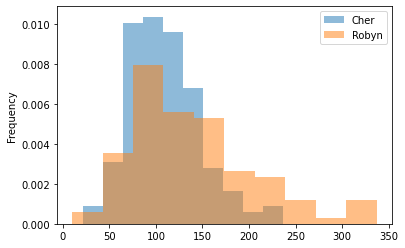

In [21]:
df = pd.DataFrame({
    "artist" : ['Cher'] * len(songTitlesCher) + ['Robyn']*len(songTitlesRobyn),
    "length" : np.concatenate((np.array(lyricLengthCher), np.array(lyricLengthRobyn)))
})

df.groupby('artist')['length'].plot(kind="hist",density=True,alpha=0.5,legend=True)